# Lab 2
By Alvaro Austin - 2106752180

In [49]:
from skimage import color, io, exposure
from scipy import fftpack as fp
import numpy as np
from scipy.linalg import hadamard
import matplotlib.pyplot as plt

## Nomor 3.1

### Part A

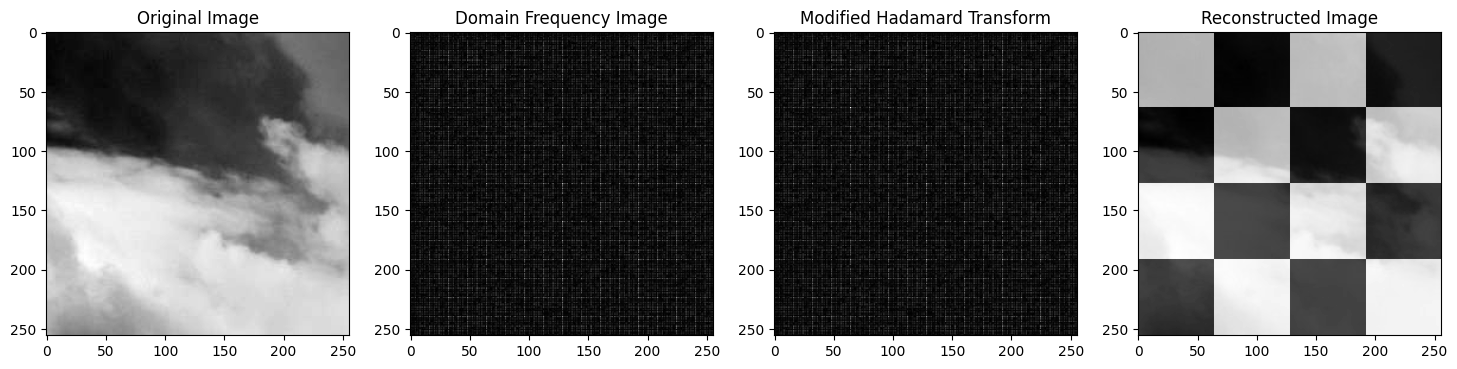

In [50]:
image = color.rgb2gray(io.imread("sight.jpg"))
image = image[:256, :256]

H = hadamard(256)

transformed_image = H @ image @ H

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Domain Frequency Image")
plt.imshow(np.log(np.abs(transformed_image)+1), cmap='gray')

modified_image = transformed_image.copy()
max_val = transformed_image.max()
# Koordinat yang dipilh adalah 64, 64
modified_image[64, 64] = max_val

plt.subplot(1, 4, 3)
plt.title("Modified Hadamard Transform")
plt.imshow(np.log(np.abs(modified_image)+1), cmap='gray')

reconstructed_image_2 = H @ modified_image @ H / (256 * 256)

plt.subplot(1, 4, 4)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image_2, cmap='gray')

plt.show()


#### Perubahan yang terjadi

Setelah memodifikasi hasil Transformasi Hadamard dengan mengganti nilai pada salah satu koordinat (dalam hal ini, (64, 64)) dengan nilai maksimum dari hasil transformasi, perubahan berikut diamati:

- Pada citra asli, gambar grayscale yang menunjukkan pemandangan alami dengan variasi intensitas, menampilkan area terang dan gelap.

- Pada citra domain frekuensi, citra ini melihatkan frekuensi dari citra hasil.

- Pada "Modified Hadamard Transform", pergantian nilai koordinat (64,64) dengan nilai maksimum, citra domain frekuensi sedikit berubah. Dapat dilihat bahwa titik (64, 64) terlihat bahwa 1 titik lebih terang/maksimum dibandingkan titik yang lain. Akan tetapi skala logaritmik perubahan visual mungkin tidak langsung terlihat dalam citra domain frekuensi.

- Terakhir, pada citra yang direkonstruksi, setelah citra domain frekuensi yang telah dimodifikasi dikembalikan ke domain spasial, citra yang direkonstruksi menunjukkan perbedaan, terutama terdapat perbedaan kontras warna setiap 64 pixel dimana 1 terang dan 1 gelap seperti chess board.

Perubahan:
- Modifikasi satu koordinat di domain frekuensi dengan nilai maksimum pada dasarnya memperkuat komponen frekuensi tertentu. Ketika frekuensi yang telah dimodifikasi ini dikembalikan ke domain spasial, hal itu memperkenalkan pola repetitif atau bentuk noise, yang terlihat seperti terbentuk grid di seluruh citra yang direkonstruksi.

- Perubahan spasial ini disebabkan oleh sifat transformasi Hadamard, yang mendekomposisi citra menjadi serangkaian fungsi dasar. Mengubah salah satu komponen ini secara signifikan mengganggu keseimbangan fungsi-fungsi tersebut, sehingga menyebabkan distorsi visual yang terlihat jelas.

### Part B

Nilai X yang diambil: 100
Jumlah koefisien nol: 65311
Rasio kompresi: 99.66%


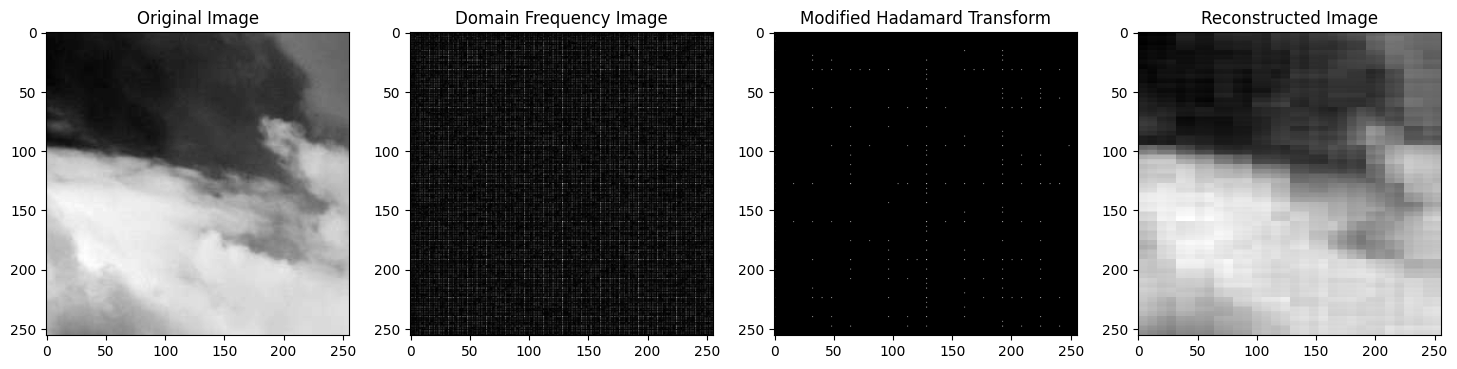

In [51]:
image = color.rgb2gray(io.imread("sight.jpg"))
image = image[:256, :256]

H = hadamard(256)

transformed_image = H @ image @ H

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Domain Frequency Image")
plt.imshow(np.log(np.abs(transformed_image)+1), cmap='gray')

# Asumsi ambil 100
X = 100
print(f"Nilai X yang diambil: {X}")

modified_image = transformed_image.copy()
modified_image[np.abs(modified_image) < X] = 0

num_zeros = np.sum(modified_image == 0)
total_elements = modified_image.size
compression_ratio = num_zeros / total_elements
print(f"Jumlah koefisien nol: {num_zeros}")
print(f"Rasio kompresi: {compression_ratio:.2%}")

plt.subplot(1, 4, 3)
plt.title("Modified Hadamard Transform")
plt.imshow(np.log(np.abs(modified_image)+1), cmap='gray')

reconstructed_image_2 = H @ modified_image @ H / (256 * 256)

plt.subplot(1, 4, 4)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image_2, cmap='gray')

plt.show()

#### Perubahan yang terjadi

Setelah menetapkan nilai `X` bernilai 100, modifikasi dilakukan dengan mengganti semua elemen hasil Transformasi Hadamard yang nilainya lebih kecil dari `X` menjadi nol. Berikut hasil pengamatannya.

- Pada citra asli, citra asli menampilkan pemandangan dengan gradasi intensitas yang alami, memperlihatkan area terang dan gelap.

- Pada citra domain frekuensi, citra ini menunjukkan hasil transformasi Hadamard dalam domain frekuensi, memperlihatkan pola garis kompleks yang merepresentasikan berbagai komponen frekuensi.

- Pada citra transformasi hadamard yang dimodifikasi, Setelah memodifikasi citra dengan mengganti nilai-nilai yang lebih kecil dari `X` bernilai 100 menjadi nol, citra dalam domain frekuensi berubah secara signifikan. Sebagian besar elemen menjadi nol, hanya tersisa beberapa nilai yang lebih besar dari 100. Hal ini menunjukkan bahwa sebagian besar informasi frekuensi rendah telah dihilangkan.

- Terakhir pada citra yang direkonstruksi, setelah mengembalikan citra yang telah dimodifikasi ke domain spasial, citra yang dihasilkan tampak lebih buram (blur). Detail halus dari citra asli hilang, membuat citra tampak seperti versi kasar dari aslinya.

Perubahan:
- Penghapusan nilai frekuensi rendah berdampak besar pada tampilan citra. Detail halus dan tekstur yang ada di citra asli sebagian besar hilang, digantikan oleh blok-blok kasar, karena citra direkonstruksi hanya dari komponen frekuensi yang tersisa. Hal ini menyebabkan citra terlihat lebih buram dan kehilangan kejelasan.

## Nomor 3.2

### Part A

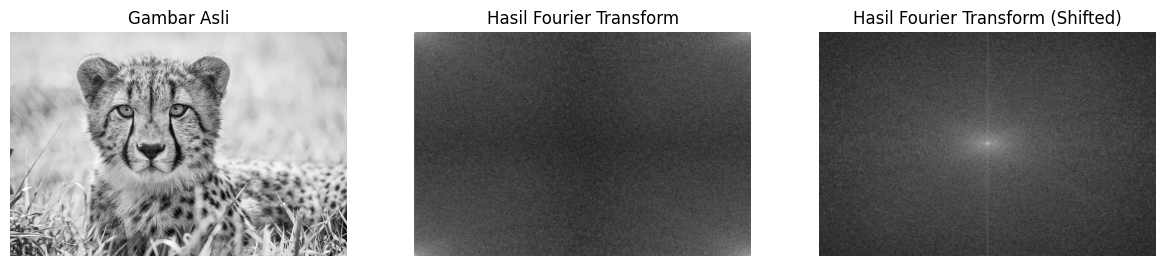

In [52]:
image = color.rgb2gray(io.imread("cheetah.jpg"))

# Calculate DFT of the image
ft = fp.fft2(image)

# Calculate magnitude of imaginary and real numbers of the DFT
ft_norm = abs(ft)

# Scale the image (frequency domain) magnitude
ft_scale = np.log(1 + ft_norm)

ft_shift = fp.fftshift(ft_scale)

plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(ft_scale, cmap="gray")
plt.title("Hasil Fourier Transform")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(ft_shift, cmap="gray")
plt.title("Hasil Fourier Transform (Shifted)")
plt.axis("off")

plt.show()

In [53]:
def dftuv(M, N):
    """ DFTUV Computes meshgrid frequency matrices.
    [U, V] = DFTUV(M, N) computes meshgrid frequency matrices U and
    V. U and V are useful for computing frequency-domain filter 
    functions that can be used with DFTFILT. U and V are both M-by-N. """

    # Set up range of variables.
    u = np.arange(M)
    v = np.arange(N)

    # Compute the indices for use in meshgrid
    for i in range(M//2+1, M):
        u[i] = u[i] - M
    for i in range(N//2+1, N):
        v[i] = v[i] - N

    # Return the meshgrid arrays
    return np.meshgrid(v,u)

def lpfilter(tipe, M, N, D0, n = 1): 
    """ LPFILTER Computes frequency domain lowpass filters
    H = LPFILTER(TYPE, M, N, D0, n) creates the transfer function of
    a lowpass filter, H, of the specified TYPE and size (M-by-N).  To
    view the filter as an image or mesh plot, it should be centered
    using H = fftshift(H).
 
    Valid values for TYPE, D0, and n are:
 
    'ideal'    Ideal lowpass filter with cutoff frequency D0.  n need
               not be supplied.  D0 must be positive
 
    'btw'      Butterworth lowpass filter of order n, and cutoff D0.
               The default value for n is 1.0.  D0 must be positive.

    'gaussian' Gaussian lowpass filter with cutoff (standard deviation)
 	           D0.  n need not be supplied.  D0 must be positive. """

    # Use function dftuv to set up the meshgrid arrays needed for 
    # computing the required distances.
    U, V = dftuv(M, N)

    # Compute the distances D(U, V).
    D = np.sqrt(U**2+V**2)

    # Begin fiter computations.
    if (tipe == 'gaussian'):
        return np.exp(-(D**2)/(2*(D0**2)))
    elif (tipe == 'btw'):
        return 1/(1 + (D/D0)**(2*n))
    elif (tipe == 'ideal'):
        return (D <= D0)
    else:
        print("Invalid type.")

def hpfilter(tipe, M, N, D0, n = 1):
    """ HPFILTER Computes frequency domain highpass filters
    H = HPFILTER(TYPE, M, N, D0, n) creates the transfer function of
    a highpass filter, H, of the specified TYPE and size (M-by-N).
    Valid values for TYPE, D0, and n are:
 
    'ideal'     Ideal highpass filter with cutoff frequency D0.  n
                need not be supplied.  D0 must be positive
 
    'btw'       Butterworth highpass filter of order n, and cutoff D0.
                The default value for n is 1.0.  D0 must be positive.
 
    'gaussian'  Gaussian highpass filter with cutoff (standard deviation)
                D0.  n need not be supplied.  D0 must be positive. """
 

    # The transfer function Hhp of a highpass filter is 1 - Hlp,
    # where Hlp is the transfer function of the corresponding lowpass
    # filter.  Thus, we can use function lpfilter to generate highpass
    # filters.
	
    # Generate highpass filter.
    Hlp = lpfilter(tipe, M, N, D0, n)
    return 1 - Hlp

def notch(tipe, M, N, D0, x, y, n = 1):
    """ notch Computes frequency domain notch filters
    H = NOTCH(TYPE, M, N, D0, x, y, n) creates the transfer function of
    a notch filter, H, of the specified TYPE and size (M-by-N). centered at
    Column X, Row Y in an unshifted Fourier spectrum.
    Valid values for TYPE, D0, and n are:
 
    'ideal'     Ideal highpass filter with cutoff frequency D0.  n
                need not be supplied.  D0 must be positive
 
    'btw'       Butterworth highpass filter of order n, and cutoff D0.
                The default value for n is 1.0.  D0 must be positive.
 
    'gaussian'  Gaussian highpass filter with cutoff (standard deviation)
                D0.  n need not be supplied.  D0 must be positive. """

    # The transfer function Hhp of a highpass filter is 1 - Hlp,
    # where Hlp is the transfer function of the corresponding lowpass
    # filter.  Thus, we can use function lpfilter to generate highpass
    # filters.

    # Generate highpass filter.
    Hlp = lpfilter(tipe, M, N, D0, n)
    H = 1 - Hlp
    H = np.roll(H, y-1, axis=0)
    H = np.roll(H, x-1, axis=1)
    return H

def paddedsize(w, l):
    """ PADDEDSIZE Computes padded sizes useful for FFT-based filtering.
    PQ = PADDEDSIZE(AB), where AB is a two-element size vector,
    computes the two-element size vector PQ = 2*AB. """

    return (2*w, 2*l)

# Method for filtering (low-pass & high-pass), taken from previous year's lab
def filtering(image_path: str, filter_type=["low", "ideal"], constanta=0.05):
    # Load the image (assuming the image is already in grayscale)
    i1 = color.rgb2gray(io.imread(image_path))
    w, l = paddedsize(i1.shape[0], i1.shape[1])

    another_d0 = int(constanta * l)
        
    # Create ideal lowpass filter
    # lpfilter function is provided in helper.py
    if filter_type[0] == "low":
        h = lpfilter(filter_type[1], w, l, int(constanta * w))
    elif filter_type[0] == "high":
        h = hpfilter(filter_type[1], w, l, int(constanta * w))

    # Calculate DFT
    f = fp.fft2(i1, (w, l))

    # Apply lowpass filter
    LPFS_image = h * f

    # Calculate IDFT for spatial domain transformation
    LPF_image = fp.ifft2(LPFS_image).real
    LPF_image = LPF_image[: i1.shape[0], : i1.shape[1]]

    # Shifting for fourier spectrum display
    Fcf = fp.fftshift(LPFS_image)

    # Scaling for fourier spectrum display
    S1 = np.log(1 + abs(Fcf))

    # Create ideal lowpass filter
    # lpfilter function is provided in helper.py
    if filter_type[0] == "low":
        h = lpfilter(filter_type[1], w, l, another_d0)
    elif filter_type[0] == "high":
        h = hpfilter(filter_type[1], w, l, another_d0)

    # Calculate DFT
    f = fp.fft2(i1, (w, l))

    # Apply lowpass filter
    CUSTOM_LPFS_image = h * f

    # Calculate IDFT for spatial domain transformation
    CUSTOM_LPF_image = fp.ifft2(CUSTOM_LPFS_image).real
    CUSTOM_LPF_image = CUSTOM_LPF_image[: i1.shape[0], : i1.shape[1]]

    # Shifting for fourier spectrum display
    Fcf_custom = fp.fftshift(CUSTOM_LPFS_image)

    # Scaling for fourier spectrum display
    S2 = np.log(1 + abs(Fcf_custom))


    # Show image
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(LPF_image, cmap="gray")
    plt.title("Result {0} Filtering, D0 = {1}".format(filter_type, int(constanta * w)))
    plt.axis("off")
    plt.subplot(2, 2, 2)
    plt.imshow(S1, cmap="gray")
    plt.title("{0} Filtering Result Fourier Spectrum, D0 = {1}".format(filter_type, int(constanta * w)))
    plt.axis("off")
    plt.subplot(2, 2, 3)
    plt.imshow(CUSTOM_LPF_image, cmap="gray")
    plt.title("{0} Filtering Result Fourier Spectrum, D0 = {1}".format(filter_type, another_d0))
    plt.axis("off")
    plt.subplot(2, 2, 4)
    plt.imshow(S2, cmap="gray")
    plt.title("{0} Filtering Result Fourier Spectrum, D0 = {1}".format(filter_type, another_d0))
    plt.axis("off")
    

def filtering_3b(image_path: str, filter_type=["low", "ideal"], constanta=0.05):
    # Load the image (assuming the image is already in grayscale)
    i1 = io.imread(image_path)
    w, l = paddedsize(i1.shape[0], i1.shape[1])

    # Create ideal lowpass filter
    # lpfilter function is provided in helper.py
    if filter_type[0] == "low":
        h = lpfilter(filter_type[1], w, l, constanta * w)
    elif filter_type[0] == "high":
        h = hpfilter(filter_type[1], w, l, constanta * w)

    # Calculate DFT
    f = fp.fft2(i1, (w, l))

    # Apply lowpass filter
    LPFS_image = h * f

    # Calculate IDFT for spatial domain transformation
    LPF_image = fp.ifft2(LPFS_image).real
    LPF_image = LPF_image[: i1.shape[0], : i1.shape[1]]

    # Shifting for fourier spectrum display
    Fc = fp.fftshift(f)
    Fcf = fp.fftshift(LPFS_image)

    # Scaling for fourier spectrum display
    S1 = np.log(1 + abs(Fc))
    S2 = np.log(1 + abs(Fcf))

    # Show image
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(i1, cmap="gray")
    plt.title("Original")
    plt.axis("off")
    plt.subplot(2, 2, 2)
    plt.imshow(S1, cmap="gray")
    plt.title("Original Fourier Spectrum")
    plt.axis("off")
    plt.subplot(2, 2, 3)
    plt.imshow(LPF_image, cmap="gray")
    plt.title("Result {0} Filtering".format(filter_type))
    plt.axis("off")
    plt.subplot(2, 2, 4)
    plt.imshow(S2, cmap="gray")
    plt.title("{0} Filtering Result Fourier Spectrum".format(filter_type))
    plt.axis("off")
    plt.show()

### Part B

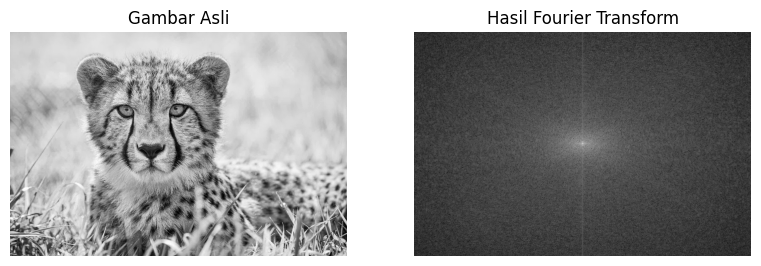

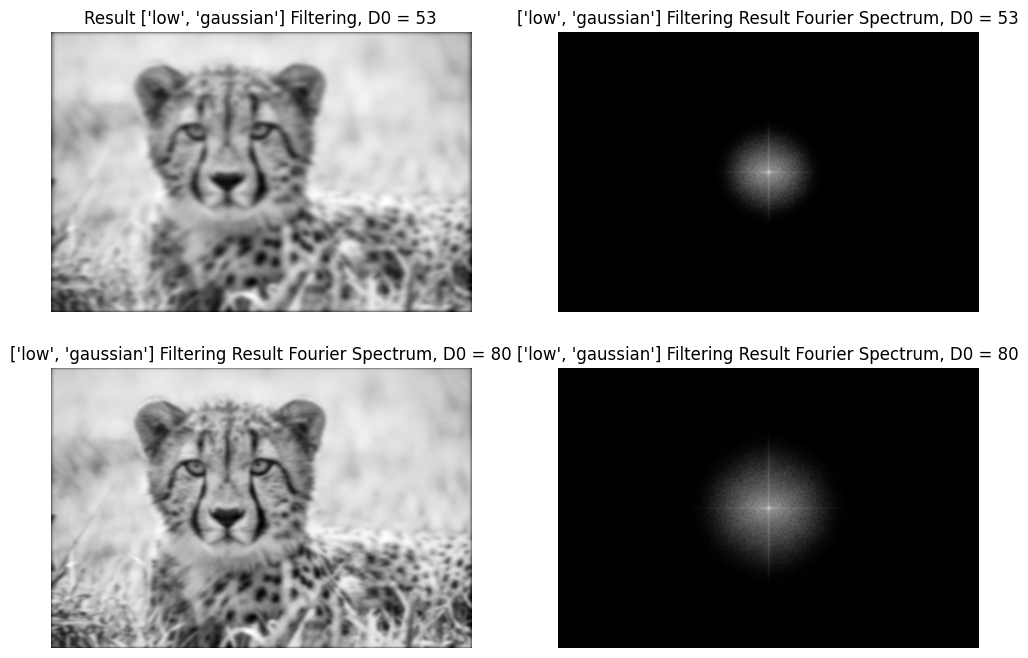

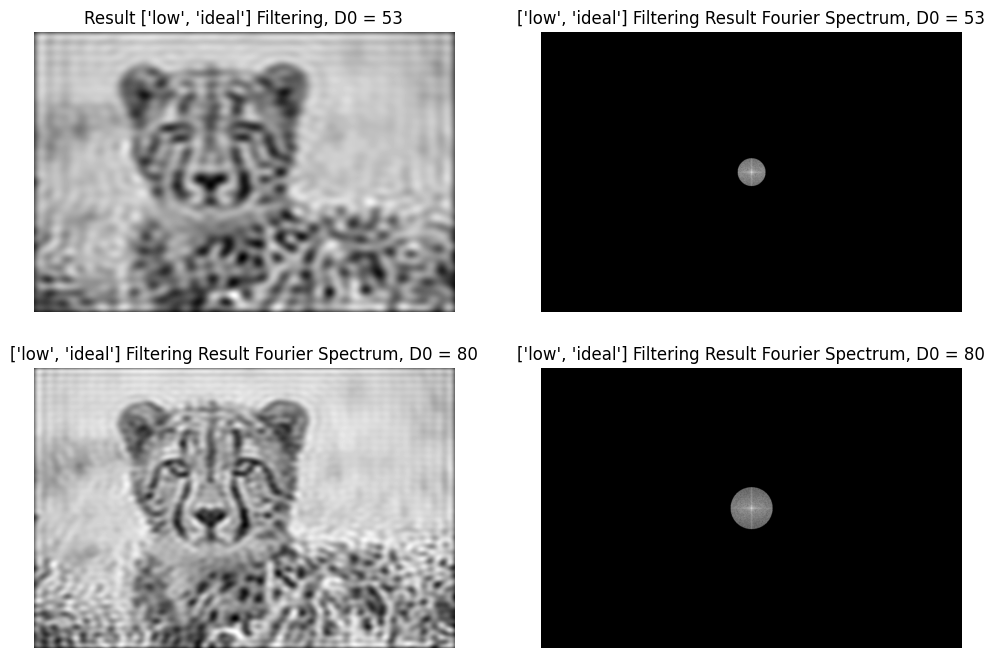

In [54]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(ft_shift, cmap="gray")
plt.title("Hasil Fourier Transform")
plt.axis("off")
plt.show()
filtering("cheetah.jpg", ["low", "gaussian"])
filtering("cheetah.jpg", ["low", "ideal"])

### Part C

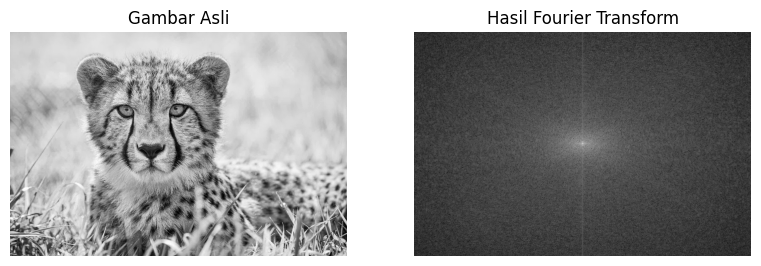

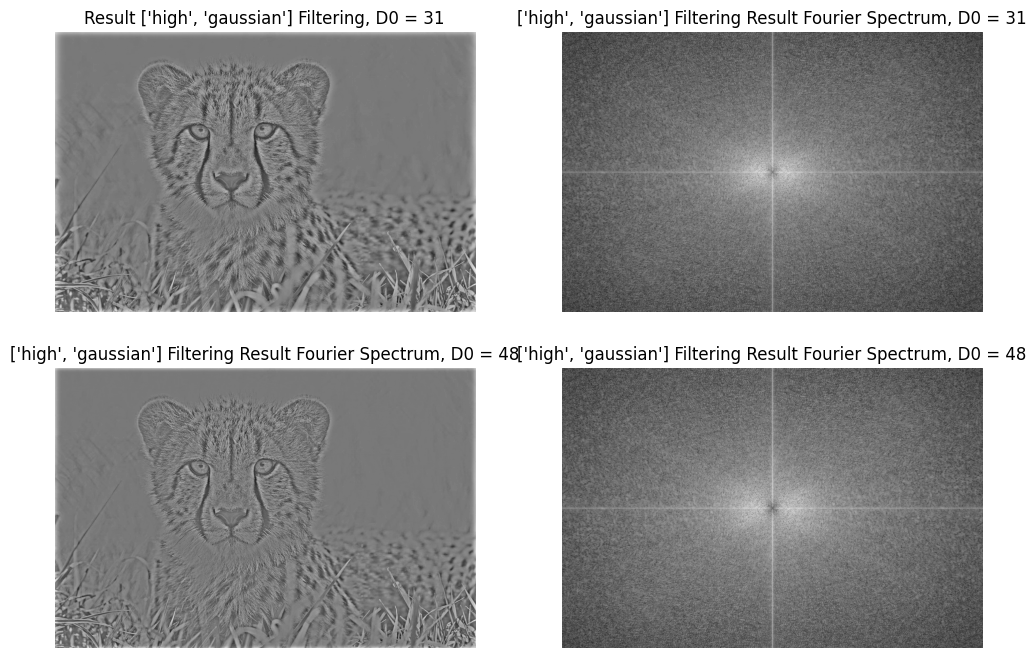

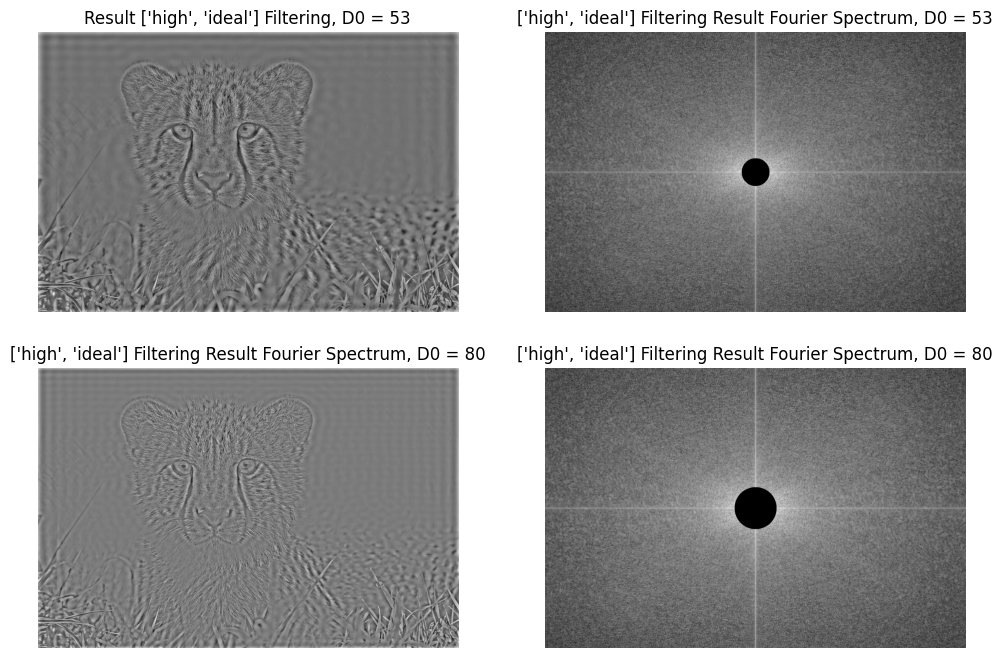

In [55]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(ft_shift, cmap="gray")
plt.title("Hasil Fourier Transform")
plt.axis("off")
plt.show()
filtering("cheetah.jpg", ["high", "gaussian"], 0.03)
filtering("cheetah.jpg", ["high", "ideal"])

### Part D

> Perbedaan pada bagian B:

Hasil low pass filtering berbeda dengan gambar asli karena gambar hasil filtering akan tampak lebih halus atau blur. Hal ini disebabkan oleh penghilangan detail-detail gambar yang berada pada frekuensi tinggi. Filter bekerja dengan cara meminimalkan (gaussian) atau menghilangkan (ideal) frekuensi yang lebih tinggi dari radius filter (D0).

Perbedaan antara Gaussian dan Ideal Low Pass filtering terletak pada efek "ringing" yang ada pada filter Ideal. Pada filter Ideal, frekuensi di atas D0 dihilangkan sepenuhnya, menyebabkan perubahan intensitas yang tajam pada domain spasial dan menimbulkan efek tersebut. Sebaliknya, pada filter Gaussian, frekuensi tinggi hanya diminimalkan, bukan dihilangkan secara langsung, sehingga transisi antara frekuensi yang diminimalkan dan tidak diminimalkan lebih halus, membuat gambar terlihat lebih smooth tanpa efek "ringing".

Perbedaan nilai D0 pada low pass filtering menunjukkan bahwa semakin rendah nilai D0, semakin sedikit rentang frekuensi yang dimaksimalkan (gaussian) atau tidak dihilangkan (ideal). Hal ini membuat gambar semakin buram karena detail-detail pada frekuensi tinggi diminimalkan (gaussian) atau dihilangkan (ideal).

> Perbedaan pada bagian C:

Hasil high pass filtering berbeda dengan gambar asli karena gambar menjadi lebih tajam (sharpening). Bagian-bagian yang memiliki perubahan intensitas yang signifikan, seperti edge, menjadi lebih jelas. Hal ini disebabkan oleh filter yang bekerja dengan meminimalkan (gaussian) atau menghilangkan (ideal) frekuensi yang lebih kecil atau sama dengan radius filter (D0).

Perbedaan antara Gaussian dan Ideal High Pass filtering adalah pada efek "ringing" yang muncul pada tipe Ideal. Pada filter Ideal, frekuensi yang tidak lebih dari D0 dihilangkan sepenuhnya, menyebabkan perubahan intensitas yang tajam di domain spasial. Sedangkan pada filter Gaussian, frekuensi rendah hanya diminimalkan, bukan dihilangkan sepenuhnya, sehingga transisi antar frekuensi lebih halus dan tidak menghasilkan efek "ringing".

Perbedaan nilai D0 pada high pass filtering menunjukkan bahwa semakin rendah nilai D0, semakin besar rentang frekuensi yang dimaksimalkan (gaussian) atau tidak dihilangkan (ideal). Akibatnya, lebih banyak detail gambar yang dapat diambil.

> Korelasi D0 pada highpass dan lowpass 

Punya hubungan terbalik: Nilai D0 memiliki hubungan terbalik pada kedua filter. Pada low pass, nilai D0 yang lebih kecil mengurangi detail, sedangkan pada high pass, nilai D0 yang lebih kecil menambah detail.

Pengaruh terhadap frekuensi: D0 pada LPF berfokus untuk menahan frekuensi rendah dan menghaluskan gambar dengan menghilangkan frekuensi tinggi. Sebaliknya, D0 pada HPF bertugas menghilangkan frekuensi rendah sehingga gambar menjadi lebih tajam dengan menekankan frekuensi tinggi.

## Nomor 3.3

### Part A

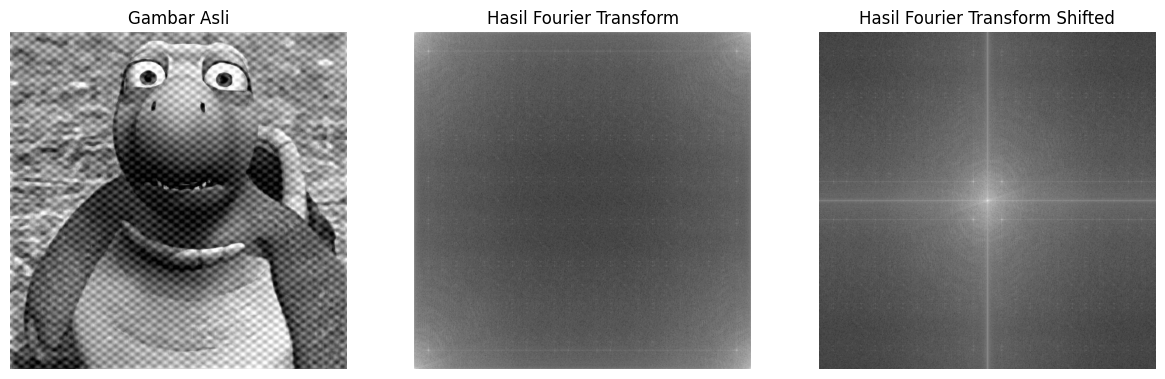

In [56]:
image = io.imread("kura_kura_bengong.jpg")

w, l = paddedsize(image.shape[0], image.shape[1])

if len(image.shape) == 3:
    image = color.rgb2gray(image)
    
#Calculate DFT of the image
ft = fp.fft2(image, (w, l))

# Calculate magnitude of imaginary and real numbers of the DFT
ft_norm = abs(ft)

# Scale the image (frequency domain) magnitude
ft_scale = np.log(1 + ft_norm)
ft_shift = fp.fftshift(ft_scale)

plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(ft_scale, cmap="gray")
plt.title("Hasil Fourier Transform")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(ft_shift, cmap="gray")
plt.title("Hasil Fourier Transform Shifted")
plt.axis("off")

plt.show()

### Part B

In [57]:
# Scaling & Shifting for fourier spectrum display

H1 = notch("btw", w, l, 15, 60, 80)
H2 = notch("btw", w, l, 15, -60, 80)
H3 = notch("btw", w, l, 15, 60, -80)
H4 = notch("btw", w, l, 15, -60, -80)


# Apply notch filter
notch_filter = ft * H1 * H2 * H3 * H4

#### Penjelasan penggunaan Notch Filter


Saya menggunakan notch filter karena berdasarkan tutorial terdapat kalimat "Notch filtering digunakan untuk menghilangkan spectral noise dari suatu citra", tidak hanya itu, saya juga diajarkan oleh Dosen dan melalui contoh tutorial bahwa Fourier Transform dapat digunakan untuk mempelajari pola frekuensi noise. Dapat dilihat pada gambar bahwa titik putih (ada 4) pada gambar menandakan noise yang ada pada gambar. Oleh karena itu, dari observasi melalui Foruier Transformation, kita dapat menghilangkan noise tersebut dengan menggunakan notch filter berdasarkan observasi X dan Y di gambar. 

Alasan lainnya mengapa notch hanya mempengaruhi frekuensi tertentu dan tidak mempengaruhi komponen frekuensi lain dari sinyal. Sementara low-pass dan high-pass filter akan memotong semua frekuensi di atas atau di bawah cutoff-nya, yang dapat menyebabkan distorsi atau kehilangan informasi penting dari citra asli.



### Part C

(np.float64(-0.5), np.float64(1439.5), np.float64(1439.5), np.float64(-0.5))

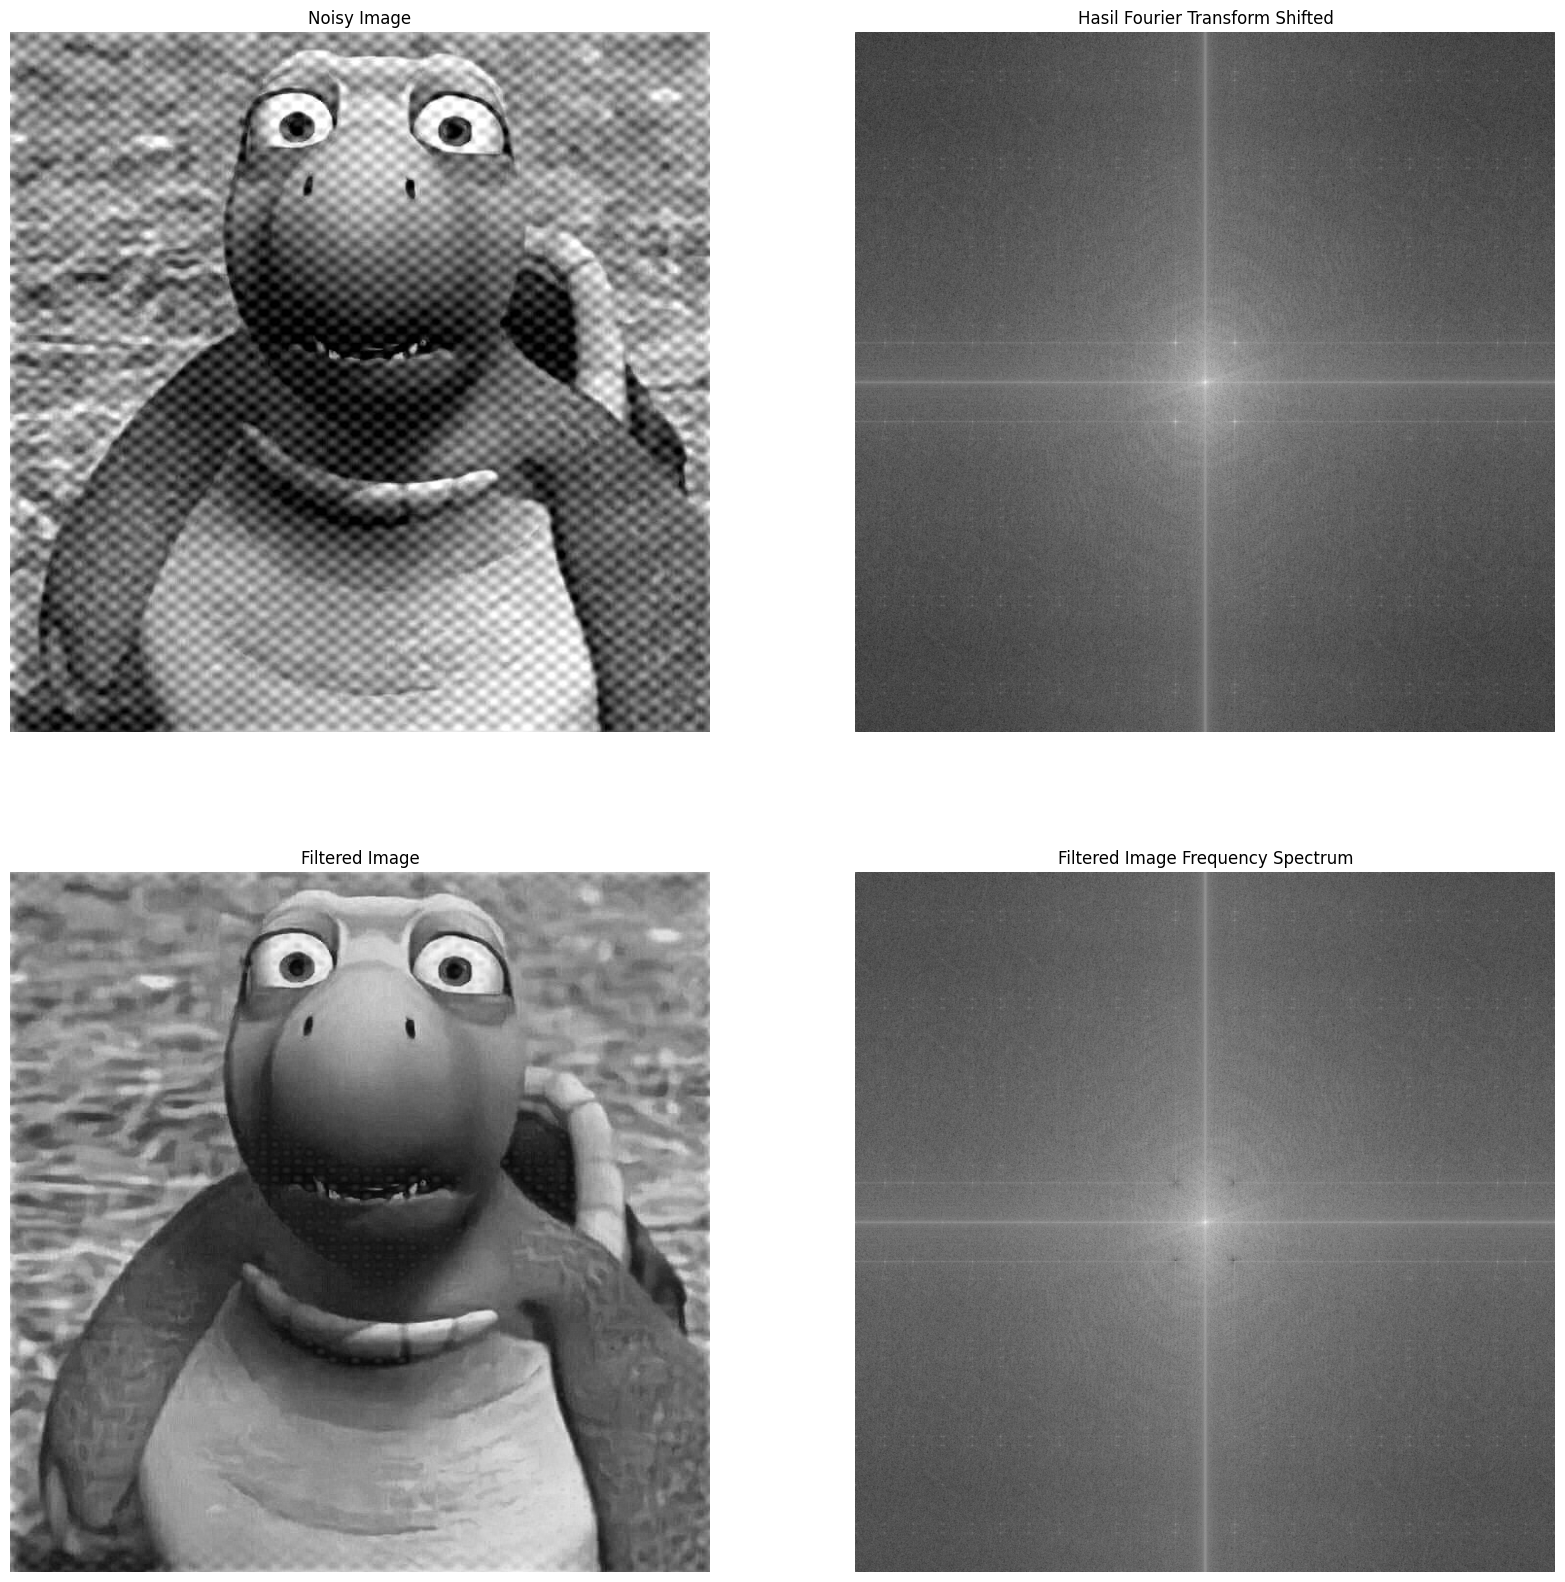

In [58]:
# Calculate IDFT for spatial domain transformation
F_image = fp.ifft2(notch_filter).real
F_image = F_image[: image.shape[0], : image.shape[1]]

# Scaling & Shifting for fourier spectrum display
Fcf = fp.fftshift(notch_filter)
S2 = np.log(1 + abs(Fcf))

# Show image
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Noisy Image")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(ft_shift, cmap="gray")
plt.title("Hasil Fourier Transform Shifted")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(F_image, cmap="gray")
plt.title("Filtered Image")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(S2, cmap="gray")
plt.title("Filtered Image Frequency Spectrum")
plt.axis("off")


> Penjelasan

Menurut saya, hasil filtering untuk menghilangkan noise sudah cukup baik karena gambar asli terlihat lebih jelas dan noise berupa bulat-bulat sudah banyak berkurang. Fourier Spectrum-nya juga berubah karena titik-titik putih yang menunjukkan noise kini telah dihilangkan dengan notch filter pada titik-titik tersebut, menjadikannya lebih gelap.